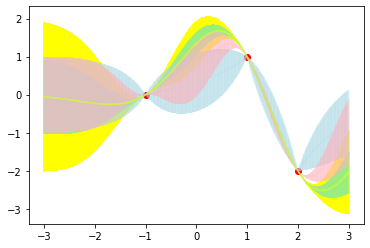

In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
def squared_exp_covariance(x, y, theta):
    return theta[1]**2 * np.exp(-(np.subtract.outer(x, y)**2))
    
def exp_covariance(x, y, theta):
    return theta[0] * np.exp( -theta[1]/2 * np.subtract.outer(x, y)**2)

def rbf_covariance(x, y, theta):
    return np.exp( -np.abs(np.subtract.outer(x,y))**2/2*theta[1]**2 )

def ornstein_covariance(x, y, theta):
    return np.exp(-1 * np.abs((np.subtract.outer(x,y))))

# Prior
θ = [2, 1]

# Data Points
x = np.array([-1., 1., 2.])
y = np.array([0., 1., -2.])

# xi is new point to predict, x and y  are known points
def predict(xi, x, kernel, theta, y):
    # append xi to convarinace matrix
    sigma = kernel(x, x, theta)
    k = np.array([kernel(xi, xdi, theta) for xdi in x])
    mu_pred = k.dot(np.linalg.inv(sigma)).dot(y)
    sigma_pred = kernel(xi, xi, theta) - k.dot(np.linalg.inv(sigma)).dot(k)
    return [mu_pred, sigma_pred]
 
x_pred = np.linspace(-3, 3, 1000)

# predict and show exp kernel 
gaussian_y_pred_exp = np.array([predict(xi, x, exp_covariance, θ, y) for xi in x_pred])
plt.errorbar(x_pred, gaussian_y_pred_exp[:,0], yerr=gaussian_y_pred_exp[:,1], capsize=0, color='yellow',alpha=0.8)

# predict and show rbf kernel 
gaussian_y_pred_rbf = np.array([predict(xi, x, rbf_covariance, θ, y) for xi in x_pred])
plt.errorbar(x_pred, gaussian_y_pred_rbf[:,0], yerr=gaussian_y_pred_rbf[:,1], capsize=0, color='lightgreen',alpha=0.4)

# predict and show ornstein kernel 
gaussian_y_pred_ornstein = np.array([predict(xi, x, ornstein_covariance, θ, y) for xi in x_pred])
plt.errorbar(x_pred, gaussian_y_pred_ornstein[:,0], yerr=gaussian_y_pred_ornstein[:,1], capsize=0, color='lightblue',alpha=0.2)

# predict and show squared exp kernel 
gaussian_y_pred_ornstein = np.array([predict(xi, x, squared_exp_covariance, θ, y) for xi in x_pred])
plt.errorbar(x_pred, gaussian_y_pred_ornstein[:,0], yerr=gaussian_y_pred_ornstein[:,1], capsize=0, color='lightpink',alpha=0.2)

plt.scatter(x, y, color='red')
